In [ ]:
# !pip3 install openai
# !pip3 install langchain
# !pip3 install langchain_community
# !pip3 install ollama

In [25]:
import os
import pandas as pd
import openai
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
import glob
import matplotlib.pyplot as plt

In [71]:
csv_files_path = "./ResultsJune2024/*.csv"
csv_files = glob.glob(csv_files_path)
print(len(csv_files))
csv_files[:5]

50


['results_Agile Project Manager_Mexico_40pages_04-06-2024.csv',
 'results_Web Developer_Mexico_40pages_04-06-2024.csv',
 'results_Network Engineer_Mexico_40pages_04-06-2024.csv',
 'results_Data Analyst_Mexico_40pages_04-06-2024.csv',
 'results_Project Analyst_Mexico_40pages_04-06-2024.csv']

In [10]:
dataframes = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df['job search'] = csv_file.split('_')[1]
    dataframes.append(df)
all_data_df = pd.concat(dataframes, ignore_index=True)

In [11]:
infocomm_jobs = [
    "Software Developer",
    "Systems Engineer",
    "Data Analyst",
    "Data Scientist",
    "Network Engineer",
    "Web Developer",
    "Database Administrator",
    "IT Security Specialist",
    "Telecommunications Engineer",
    "Business Analyst",
    "BI Analyst (Business Intelligence)",
    "Business Analytics Consultant",
    "Business Analysis Specialist",
    "Cybersecurity Analyst",
    "Information Security Manager",  
    "Cybersecurity Consultant",
    "Penetration Tester",
    "Ethical Hacker",
    "Security Architect",
    "Network Security Engineer",
    "Information Assurance Analyst",
    "Incident Response Analyst",
    "Vulnerability Analyst",
    "Compliance Analyst",
    "Security Software Developer","IT Project Manager",
    "Technical Project Manager",
    "Digital Project Manager",
    "Agile Project Manager",
    "Scrum Master",
    "Program Manager",
    "Project Coordinator",
    "Project Analyst",
    "Portfolio Manager",
    "PMO Analyst (Project Management Office Analyst)",
    "Change Management Specialist",
    "Implementation Manager",
    "Project Lead",
    "Product Owner",
    "DevOps Engineer",
    "Cloud Architect",    
    "Systems Administrator",
    "IT Support Specialist",
    "Network Administrator",
    "IT Consultant",
    "Technical Support Engineer",
    "Cybersecurity Engineer",
    "IT Auditor",
    "Quality Assurance Analyst",
    "IT Trainer",
    "Network Operations Center (NOC) Technician"]

In [12]:
all_data_df.head()

,Position,Company_Name,Location,Post_Month,Post_Year,Details,job search
0,Scrum Master,Scrum Master,Petco,May,2024,"Create a healthier, brighter future for pets, ...",Agile Project Manager
1,Sr. Project Manager / Scrum Master,Sr. Project Manager / Scrum Master,Advancio,May,2024,This is a remote position.\n\nBout the Advanci...,Agile Project Manager
2,Tagging Project Manager_Scrum Master,Tagging Project Manager_Scrum Master,Petco,May,2024,"Create a healthier, brighter future for pets, ...",Agile Project Manager
3,Scrum Master (AI development company),Scrum Master (AI development company),The Rocket Code,May,2024,Join the AI Revolution with rocket code!\n\nAt...,Agile Project Manager
4,Project Manager,Project Manager,Acute Talent,April,2024,El aspirante debe poseer experiencia en metodo...,Agile Project Manager


In [13]:
all_data_df.shape

(2884, 7)

In [14]:
grouped_job_search = all_data_df.groupby('job search').size().reset_index(name='count')
grouped_job_search.head()

,job search,count
0,Agile Project Manager,55
1,BI Analyst (Business Intelligence),59
2,Business Analysis Specialist,58
3,Business Analyst,60
4,Business Analytics Consultant,59


In [15]:
unique_job_search = all_data_df['job search'].unique()
jobs_not_in_df = [job for job in infocomm_jobs if job not in unique_job_search]
jobs_not_in_df

['Network Operations Center (NOC) Technician']

In [16]:
all_data_df.shape

(2884, 7)

In [ ]:
# Install ollama

# Pull the model
!ollama pull llama3

# Run the model
!ollama run llama3

In [17]:
# os.environ["OPENAI_API_KEY"] = "sk-proj-1Kj43VNIJ0py9nQFQlR2T3BlbkFJPcKIvW2A9al2w3IZnr3H"
# OPENAI_API_KEY: str = os.environ.get("OPENAI_API_KEY")


In [ ]:
def save_current_index(index):
    with open("current_index.txt", "w") as file:
        file.write(str(index))

def load_last_index():
    if os.path.exists("current_index.txt"):
        with open("current_index.txt", "r") as file:
            return int(file.read())
    return 0

In [69]:
# Here, we're using OpenAI to wrap the Llama3 running model
# For more references: https://github.com/ollama/ollama/blob/main/docs/openai.md
from openai import OpenAI

client = OpenAI(
    base_url='http://localhost:11434/v1/',

    # required but ignored
    api_key='ollama',
)

In [ ]:
# Unitary case to test the time it takes

text = """
If you want to make a real difference, create an exciting career path, feel welcome to be your whole self and nurture your wellbeing, Petco is the place for you.

Our core values capture that spirit as we work to improve lives by doing what’s right for pets, people and our planet.
We love all pets like our own
We’re the future of the pet industry
We’re here to improve lives
We drive outstanding results together
We’re welcome as we are

Petco is a category-defining health and wellness company focused on improving the lives of pets, pet parents and Petco partners. We are 29,000 strong, working together across 1,500+ pet care centers, 250+ Vetco Total Care hospitals, hundreds of preventive care clinics, eight distribution centers and two support centers.

Essential Job Functions
Coordinates activities of team members (e.g., staff from software development, quality assurance, user experience, test, etc.) to ensure Agile values, principles, methodologies and processes are followed during an Agile-based software development lifecycle (SDLC).
Confers with team members to provide advice and to resolve problems.
Guides and coaches team members to become self-organized, self-assess, and achieve higher levels of performance.
Facilitates and supports team events (e.g., project planning meetings, retrospectives, demonstrations, software releases, process reviews, etc.).
Develops and tracks metrics. Prepares reports to help team understand its progress during a sprint, work process or project, and identifies trends for team members and management.
Provides training and guidance and assigns tasks to less experienced staff members.
Develops and maintains Agile documentation and training materials and conducts training.

Required Skills and Qualifications
Bachelor’s degree in Computer Science or similar.
Certified Scrum Master (CSM) and Certified Product Owner (CSPO), or similar.
5 years of experience as a Scrum Master or as a Project Manager for Lean-Agile delivery team using a variety of methodologies (e.g., Waterfall, Agile, Hybrid).
Proven track record of delivering successful projects in a matrixed Agile and traditional project management environment.
General knowledge of work management and Microsoft Teams collaboration software.
Excellent verbal and written communications skills; comfortable working directly with and providing status information to executive leadership and project stakeholders.
Excellent leadership, prioritization, organizational skills, team building, resource planning, and resource management skills
Ability to represent the company in a professional and positive manner and promote company values.

Note: Current responsibilities are impacted by company and team priorities that may have evolved from what is displayed in the Workday job profile. The description provides general job duties and requirements, but the partner’s manager may assign additional responsibilities or tasks depending on business needs.

Petco Animal Supplies, Inc. is an Equal Opportunity Employer. All qualified applicants will receive consideration for employment without regard to race, color, religion, sex, sexual orientation, gender identity, national origin, disability, age, protected veteran status, or any other protected classification.
"""

question = "Provide a concise list of competences, skills, abilities, and knowledge mentioned in the text. Split lengthy items into smaller components. Your response should solely consist of a list of competences. If an item contains commas, break it down into separate entities. Your answer should consist solely on an enumerated list, nothing else."

chat_completion = client.chat.completions.create(
            messages=[
                {
                    'role': 'user',
                    'content': question + text,
                }
            ],
            model='llama3',
        )

In [70]:
print(type(chat_completion.choices[0].message))
print(type(chat_completion.choices[0].message.content))
print()
output = chat_completion.choices[0].message.content
lines = output.split('\n')
new_output = '\n'.join(lines[2:])
print(new_output)

<class 'openai.types.chat.chat_completion_message.ChatCompletionMessage'>
<class 'str'>

1. Agile values
2. Agile principles
3. Agile methodologies
4. Agile processes
5. Software development lifecycle (SDLC)
6. Team coordination
7. Problem-solving
8. Coaching
9. Self-organization
10. Performance improvement
11. Event facilitation
12. Report preparation
13. Task assignment
14. Training provision
15. Documentation maintenance
16. Microsoft Teams collaboration software knowledge
17. Work management general knowledge
18. Verbal communication skills
19. Written communication skills
20. Executive leadership communication skills
21. Project stakeholder communication skills
22. Leadership skills
23. Prioritization skills
24. Organizational skills
25. Team building skills
26. Resource planning skills
27. Resource management skills
28. Professional representation skills
29. Positive promotion of company values
30. General knowledge of computer science
31. Certified Scrum Master (CSM)
32. Certifi

In [ ]:
i = load_last_index()

for index, (x, y) in enumerate(zip(all_data_df["job search"], all_data_df["Details"])):
    if index < i:
        continue
    
    if len(str(x)) > 3:
        i += 1
        save_current_index(i)

        text = y.strip()
        question = "Provide a concise list of competences, skills, abilities, and knowledge mentioned in the following text. Split lengthy items into smaller components. Your response should solely consist of a list of competences. If an item contains commas, break it down into separate entities. Your answer should consist solely on an enumerated list, nothing else."

        chat_completion = client.chat.completions.create(
            messages=[
                {
                    'role': 'user',
                    'content': question + ' ' + text,
                }
            ],
            model='llama3',
        )

        output = chat_completion.choices[0].message.content
        lines = output.split('\n')
        new_output = '\n'.join(lines[2:])
        
        new_row = pd.DataFrame({'job search': [x], 'competences': [new_output]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)
    
    else:
        print("Job description not found")
        new_row = pd.DataFrame({'job search': [x], 'competences': ["Job description not found"]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

In [66]:
results_df.shape

(36, 2)

In [ ]:
results_df.to_csv('competences_results.csv', index=False)
print(results_df)

In [9]:
# df_joined.head()

,job search,competences
0,Program Manager,\n\n1. Training and coaching experience\n2. Kn...
1,Program Manager,\n\n1. Project/Program Management\n2. Resource...
2,Program Manager,\n\n1. Project/program management\n2. Consulti...
3,Program Manager,\n\n1. Program management\n2. Customer-facing ...
4,Program Manager,\n\n1. Program management\n2. Business and tec...


In [9]:
# all_data_df['competences'] = df_joined['competences']

In [16]:
# all_data_df.tail()

,Position,Company_Name,Location,Post_Month,Post_Year,Details,job search,competences
3069,Business Analyst 4,Business Analyst 4,"Anveta, Inc",May,2024,"Hi Team,\n\nBusiness Analyst 4\n\nLocation : C...",Business Analytics Consultant,\n\n1. Financial services knowledge\n2. Logist...
3070,Business Analyst,Business Analyst,SkyHive,April,2024,About SkyHive\nThe future of work is about mov...,Business Analytics Consultant,\n\n1. AI and design capabilities\n2. Traditio...
3071,Business Analyst,Business Analyst,RoadFlex,April,2024,Our Mission\nRoadFlex’s mission is to moderniz...,Business Analytics Consultant,\n\n1. Public sector experience\n2. Health and...
3072,Business Analyst Consultant,Business Analyst Consultant,Sia Partners,May,2024,Sia Partners is a next-generation management c...,Business Analytics Consultant,NaN
3073,Tableau Business Analyst/Developer,Tableau Business Analyst/Developer,Steneral Consulting,April,2024,Locals only\n\nNeed 3 managerial references\n\...,Business Analytics Consultant,NaN


In [10]:
# all_data_df = all_data_df[:-2]

In [18]:
# all_data_df.shape

(3072, 8)

In [37]:
# all_data_df.to_csv('all_data_with_competences.csv', index=False)

In [39]:
# def plot_skill_count(skill_list):
#     df = pd.DataFrame({'skills': skill_list})
#     df = df.explode('skills')
#     plt.figure(figsize=(10, 8))
#     df['skills'].value_counts().plot(kind='bar')
#     plt.xlabel('Skills')
#     plt.ylabel('Count')
#     plt.title('Count of Skills')
#     plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
#     plt.tight_layout()
#     plt.show()


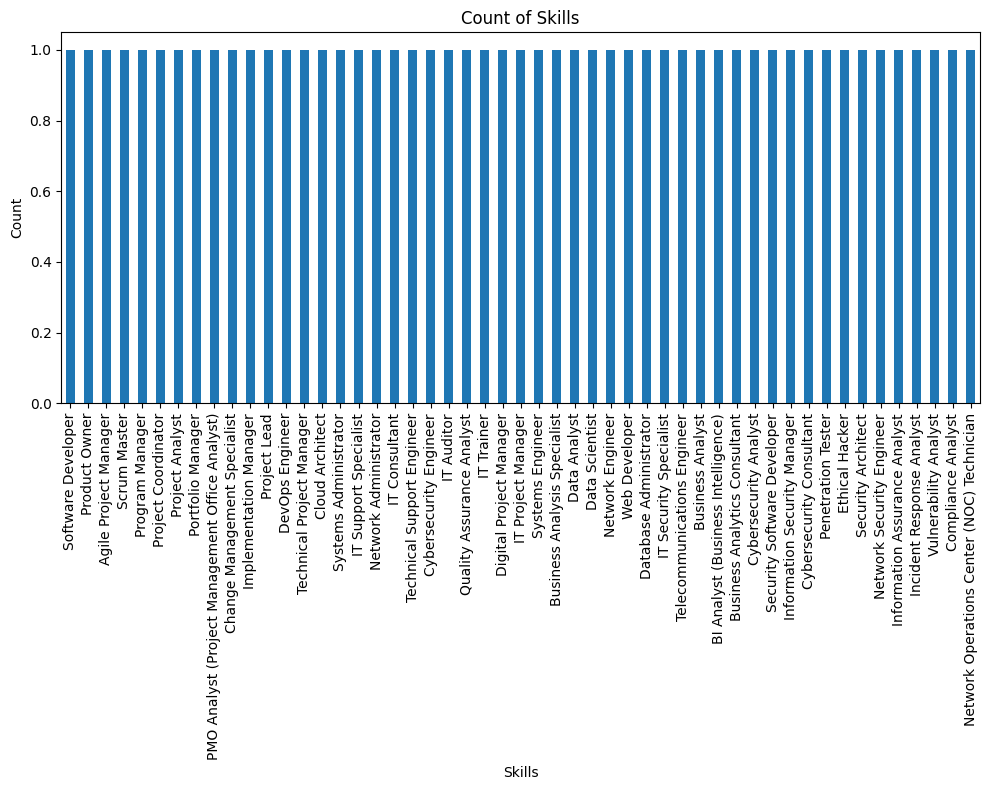

In [44]:
# plot_skill_count(infocomm_jobs)

In [45]:
def clean_and_split(input_string):
    elements = input_string.split('\n')
    cleaned_elements = []
    for elem in elements:
        parts = elem.split('. ')
        if len(parts) >= 2 and parts[1].strip():
            cleaned_elements.append(parts[1].strip())
    return cleaned_elements

In [11]:
# result_list = []
# for x in all_data_df["competences"]:
#     elements = x.split('\n')
#     for elem in elements:
#         parts = elem.split('. ')
#         if len(parts) >= 2 and parts[1].strip():
#             result_list.append(parts[1].strip())

In [20]:
# from collections import Counter

# Counter(result_list).keys() # equals to list(set(words))
# Counter(result_list).values() # counts the elements' frequency

dict_values([1, 1, 1, 1, 1, 10, 6, 56, 132, 1, 42, 1, 390, 1, 18, 1, 1, 1, 1, 1, 1, 16, 14, 162, 582, 1, 1, 1, 1, 4, 5, 2, 1, 359, 7, 69, 12, 17, 7, 2, 28, 1, 1, 1, 2, 13, 30, 322, 11, 92, 119, 6, 5, 120, 4, 4, 65, 19, 254, 10, 19, 41, 17, 39, 14, 10, 4, 4, 72, 32, 37, 60, 5, 25, 13, 7, 42, 11, 11, 7, 2, 2, 27, 58, 15, 442, 416, 5, 10, 3, 24, 7, 84, 3, 3, 41, 65, 1, 8, 1, 76, 7, 1, 8, 1, 1, 4, 1, 1, 75, 71, 4, 328, 54, 16, 15, 178, 1, 1, 121, 274, 3, 11, 679, 6, 1, 1, 43, 15, 2, 30, 517, 364, 3, 52, 22, 1, 107, 29, 5, 82, 11, 24, 60, 3, 3, 1, 5, 1, 1, 110, 63, 415, 31, 6, 21, 33, 1, 1, 1, 1, 1, 11, 145, 22, 24, 32, 6, 83, 24, 116, 10, 5, 5, 3, 1, 11, 100, 1, 9, 1, 1, 1, 5, 1, 1, 1, 117, 1, 1, 8, 14, 1, 1, 105, 443, 56, 194, 3, 1, 8, 112, 150, 139, 5, 223, 43, 697, 46, 60, 1, 1, 29, 1, 4, 3, 3, 8, 7, 26, 2, 5, 2, 128, 29, 11, 21, 11, 3, 2, 2, 8, 18, 2, 10, 2, 7, 17, 64, 38, 21, 26, 5, 1, 2, 2, 16, 5, 1, 1, 6, 215, 13, 4, 3, 9, 3, 1, 5, 2, 1, 1, 36, 10, 86, 70, 7, 1, 1, 1, 1, 1, 1, 8, 23

In [12]:
# unique_set = set(result_list)
# unique_count = len(unique_set)

In [13]:
golden_temp = pd.read_csv("golden_temp.csv")
golden = pd.read_csv("golden_ksa.csv")
#------------------------------------
set_ksa_text_TEMP = set()
set_ksa_stext_TEMP = set()
for ksa in golden_temp["Text"]:
    set_ksa_text_TEMP.add(ksa)
for ksa in golden_temp["Standard text"]:
    set_ksa_text_TEMP.add(ksa)
#------------------------------------
set_ksa_text = set()
set_ksa_stext = set()
for ksa in golden["Text"]:
    set_ksa_text.add(ksa)
for ksa in golden["Standard text"]:
    set_ksa_text.add(ksa)

In [15]:
len(set_ksa_text_TEMP)

34171

In [16]:
total_annotated_text_TEMP = 0
total_annotated_stext_TEMP = 0
total_annotated_text = 0
total_annotated_stext = 0
for item in unique_set:
    if item in set_ksa_text_TEMP:
        total_annotated_text_TEMP += 1
for item in unique_set:
    if item in set_ksa_stext_TEMP:
        total_annotated_stext_TEMP += 1
for item in unique_set:
    if item in set_ksa_text:
        total_annotated_text += 1
for item in unique_set:
    if item in set_ksa_stext:
        total_annotated_stext += 1

In [17]:
print("TOTAL JOB POSTS: ", all_data_df.shape[0])
print("TOTAL RAW KSAs: ", len(result_list))
print("TOTAL UNIQUE KSAs: ", unique_count)
print("------------------------------------")
print("TOTAL UNIQUE 'TEXT' VALUES IN GOLDEN_TEMP: ", len(set_ksa_text_TEMP))
print("TOTAL UNIQUE 'STANDARD TEXT' VALUES IN GOLDEN_TEMP: ", len(set_ksa_stext_TEMP))
print("TEXT VALUES IN JOB POSTS: ", total_annotated_text_TEMP)
print("STANDARD TEXT VALUES IN JOB POSTS: ", total_annotated_stext_TEMP)
print("------------------------------------")
print("TOTAL UNIQUE 'TEXT' VALUES IN GOLDEN: ", len(set_ksa_text))
print("TOTAL UNIQUE 'STANDARD TEXT' VALUES IN GOLDEN: ", len(set_ksa_stext))
print("TEXT VALUES IN JOB POSTS: ", total_annotated_text)
print("STANDARD TEXT VALUES IN JOB POSTS: ", total_annotated_stext)

TOTAL JOB POSTS:  3072
TOTAL RAW KSAs:  98557
TOTAL UNIQUE KSAs:  42626
------------------------------------
TOTAL UNIQUE 'TEXT' VALUES IN GOLDEN_TEMP:  34171
TOTAL UNIQUE 'STANDARD TEXT' VALUES IN GOLDEN_TEMP:  0
TEXT VALUES IN JOB POSTS:  6383
STANDARD TEXT VALUES IN JOB POSTS:  0
------------------------------------
TOTAL UNIQUE 'TEXT' VALUES IN GOLDEN:  3379
TOTAL UNIQUE 'STANDARD TEXT' VALUES IN GOLDEN:  0
TEXT VALUES IN JOB POSTS:  1259
STANDARD TEXT VALUES IN JOB POSTS:  0


In [30]:
import pandas as pd

# Read golden KSA's
golden = pd.read_csv("golden_ksa.csv")
golden_temp = pd.read_csv("golden_temp.csv")

ksa_set = set()
k, s, a, o = 0, 0, 0, 0
set_k, set_s, set_a, set_o = set(), set(), set(), set()

for ksa in golden_temp["Standard text"]:
    ksa_set.add(ksa)
    indices = golden_temp.index[golden_temp["Standard text"] == ksa].tolist()
    if indices:
        index = indices[0]
        label = golden_temp.at[index, 'Label']
        if label == "Knowledge":
            k += 1
            set_k.add(ksa)
        elif label == "Skill":
            s += 1
            set_s.add(ksa)
        elif label == "Ability":
            a += 1
            set_a.add(ksa)
        elif label == "Other":
            o += 1
            set_o.add(ksa)
    else:
        print(f"No matching index found for '{ksa}'")

print(f"Total KSA's: {len(golden_temp)}")
print(f"Total UNIQUE KSA's: {len(ksa_set)}")
print("---------------------------------")
print(f"Total K: {k}")
print(f"Total S: {s}")
print(f"Total A: {a}")
print(f"Total O: {o}")
tot = k + s + a + o
print(f"Tot: {tot}")
print("---------------------------------")
print(f"Unique K: {len(set_k)}")
print(f"Unique S: {len(set_s)}")
print(f"Unique A: {len(set_a)}")
print(f"Unique O: {len(set_o)}")
tot_u = len(set_k) + len(set_s) + len(set_a) + len(set_o)
print(f"Tot: {tot_u}")

No matching index found for 'nan'
Total KSA's: 34192
Total UNIQUE KSA's: 32820
---------------------------------
Total K: 19443
Total S: 4487
Total A: 1735
Total O: 8524
Tot: 34189
---------------------------------
Unique K: 18806
Unique S: 3976
Unique A: 1513
Unique O: 8522
Tot: 32817
